# Programming Exercise 6: Support Vector Machines (SVM)

In [3]:
import numpy as np
from scipy.io import loadmat
from scipy.optimize import fmin_cg
from sklearn import svm
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

## Example dataset (Linearly seperable)

In [4]:
dataset = loadmat('ex6\ex6data1.mat')
X, y = dataset['X'], dataset['y']
#pos = np.array((y==1))
#neg = np.array((y==0))
pos = X[np.where(y==1)[0]]
neg = X[np.where(y==0)[0]]

In [32]:
def plotData(pos, neg, title="Example dataset"):
    plt.figure(figsize=(10,6))
    plt.title(title, fontsize=16)
    plt.scatter(pos[:, 0], pos[:, 1], marker='+', label="Positive Example")
    plt.scatter(neg[:, 0], neg[:, 1], marker='o', label="Negative Example")
    plt.xlabel("Column 1 Variable")
    plt.ylabel("Column 2 Variable")
    plt.grid()
    plt.legend()

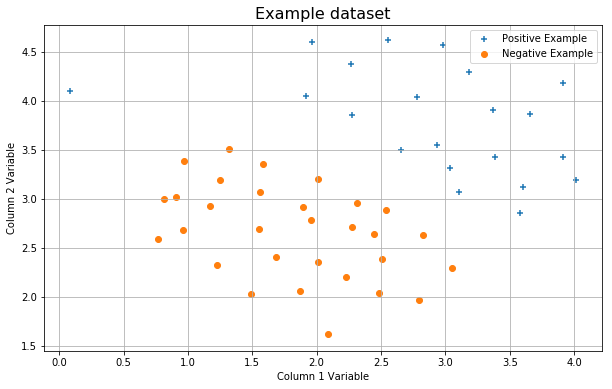

In [6]:
plotData(pos, neg)

## SVM hypothesis recall
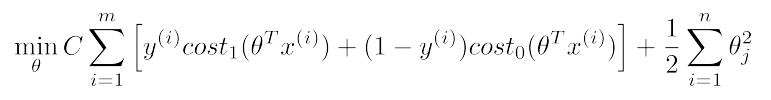

## Plotting Decision Boundary with different values of C
Remember that:
C parameter is a positive value that controls the penalty for misclassified training examples.
Also, C plays a role similar to 1/λ (1/lambda), where λ is the regularization parameter that we used in Logistic Regression.


In [7]:
def plotDecisionBoundary(X, y, model, title):
    """Plots a linear decision boundary
    learned by the SVM and overlays the data on it
    """
    w = model.coef_.flatten()
    b = model.intercept_.flatten()
    x_pred = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_pred = -(w[0]*x_pred + b)/w[1]
    plotData(pos, neg, title=title)
    plt.plot(x_pred, y_pred, '-b', c='green')

## Plotting Linear Model with C = 1


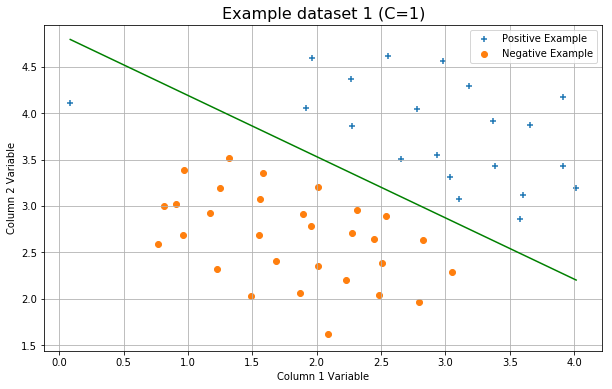

In [8]:
svm_clf = svm.SVC(C=1, kernel='linear')
linear_model = svm_clf.fit(X, y.ravel())
plotDecisionBoundary(X, y, linear_model, title='Example dataset 1 (C=1)')

## Plotting Linear Model with C = 100
Remember that, a large value of C will cause the model to fit into the data very well, thus overfitting.

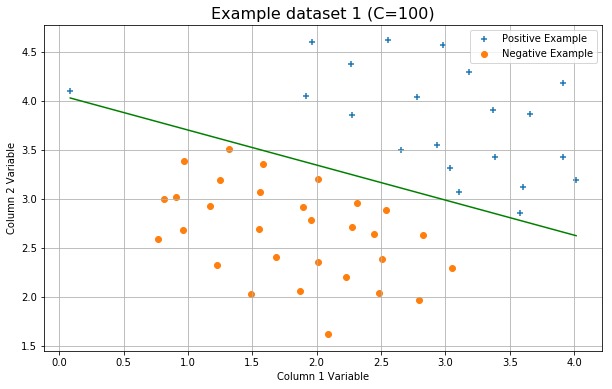

In [9]:
svm_clf = svm.SVC(C=100, kernel='linear')
linear_model = svm_clf.fit(X, y.ravel())
plotDecisionBoundary(X, y, linear_model, title='Example dataset 1 (C=100)')

## SVM with Gaussian Kernels

In [10]:
def gaussianKernel(x1, x2, sigma):
    sigmasquared = np.square(sigma)
    return np.exp(-(x1-x2).T.dot(x1-x2) / (2*sigmasquared))

In [11]:
print(gaussianKernel(np.array([1, 2, 1]),np.array([0, 4, -1]), 2.))
#This should output a value about 0.3247

0.32465246735834974


## Example dataset (None Linearly Seperable)

In [12]:
data2 = loadmat('ex6\ex6data2.mat')
X_2 = data2['X']
y_2 = data2['y']

pos_2 = X_2[np.where(y_2==1)[0]]
neg_2 = X_2[np.where(y_2==0)[0]]

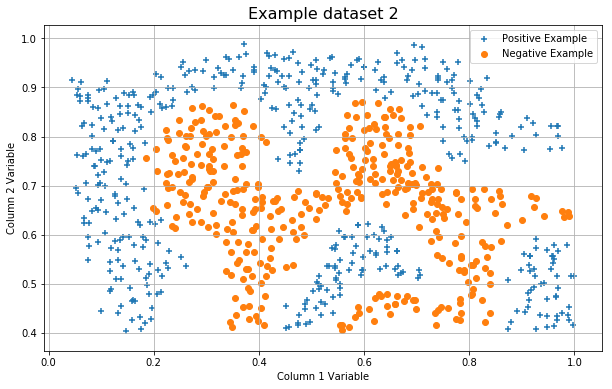

In [13]:
plotData(pos_2, neg_2, "Example dataset 2")

# Plotting None Linear Model

In [24]:
def plotNoneLinearDecisionBoundary(X, y, model, title):
    """plots a non-linear decision boundary learned by the
    SVM and overlays the data on it"""

# Plot the training data on top of the boundary
    plotData(X, y, title)

    # Make classification predictions over a grid of values
    x1plot = np.linspace(min(X[:,0]), max(X[:,0]), X.shape[0]).T
    x2plot = np.linspace(min(X[:,1]), max(X[:,1]), X.shape[0]).T
    X1, X2 = np.meshgrid(x1plot, x2plot)
    vals = np.zeros(X1.shape)

    for i in range(X1.shape[1]):
        this_X = np.column_stack((X1[:, i], X2[:, i]))
        vals[:, i] = model.predict(this_X)

    # Plot the SVM boundary
    plt.contour(X1, X2, vals, colors='g', linewidths=1)

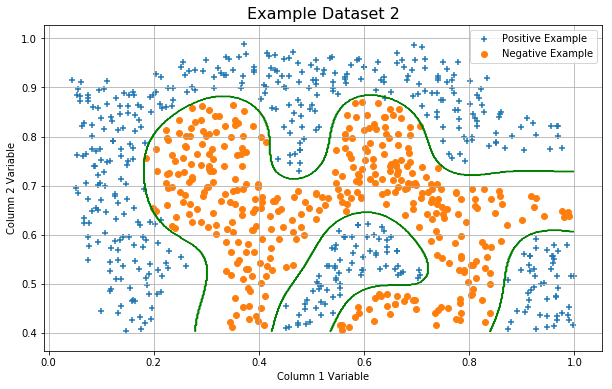

In [26]:
sigma = 0.1
gamma = np.power(sigma,-2.)

# We set the tolerance and max_passes lower here so that the code will run
# faster. However, in practice, you will want to run the training to
# convergence.

clf = svm.SVC(C=1, kernel='rbf', gamma=gamma)
model = clf.fit(X_2, y_2.flatten())
plotNoneLinearDecisionBoundary(pos_2, neg_2, model, "Example Dataset 2")

In [27]:
data3 = loadmat('ex6/ex6data3.mat')
X_3 = data3['X']
y_3 = data3['y']

In [28]:
pos_3 = X_3[np.where(y_3==1)[0]]
neg_3 = X_3[np.where(y_3==0)[0]]

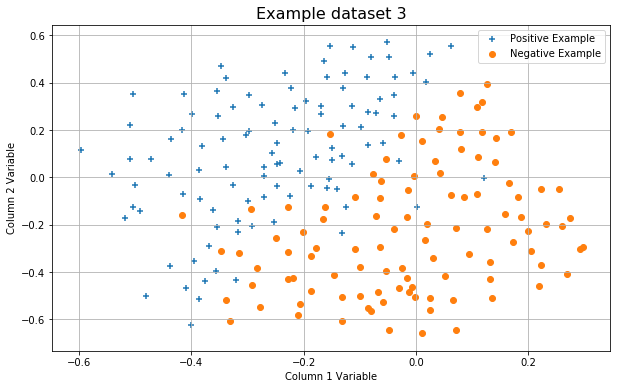

In [30]:
plotData(pos_3, neg_3, title='Example dataset 3')

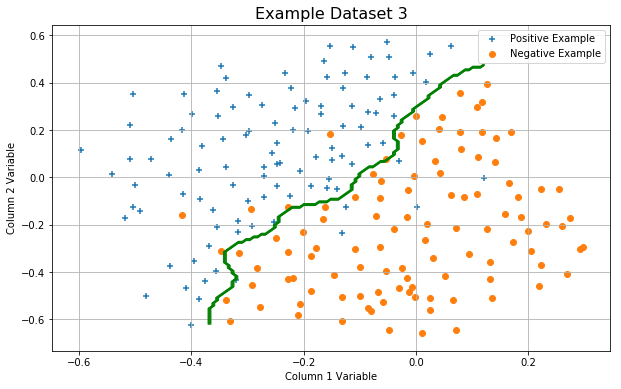

In [31]:
clf = svm.SVC(C=1, kernel='rbf', gamma=gamma)
model = clf.fit(X_3, y_3.flatten())
plotNoneLinearDecisionBoundary(pos_3, neg_3, model, title='Example Dataset 3')